## Heart Disease Prediction
- To identify whether the person belongs to heart disease or not

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [37]:
# check for the columns which has below 5 classes 
for column in list(data.columns[:-1]):
    if len(data[column].unique()) <= 5:
        print("{}: {}".format(column ,data[column].unique()))
        

sex: [1 0]
cp: [3 2 1 0]
fbs: [1 0]
restecg: [0 1 2]
exang: [0 1]
slope: [0 2 1]
ca: [0 2 1 3 4]
thal: [1 2 3 0]


### Exploratory Data Analysis

In [57]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [38]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

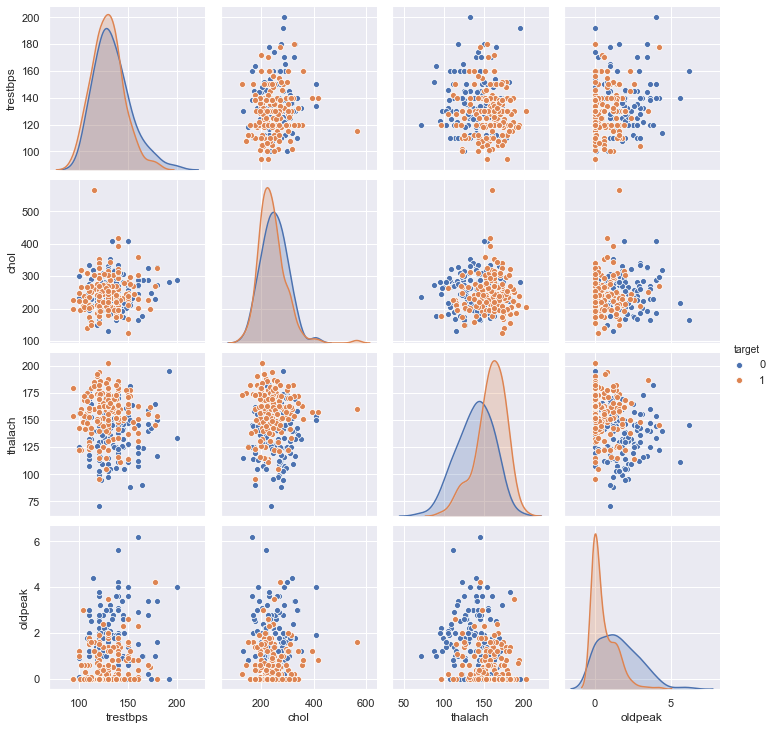

In [56]:
sns.pairplot(data[['trestbps','chol', 'thalach', 'oldpeak', 'target']], hue= 'target')

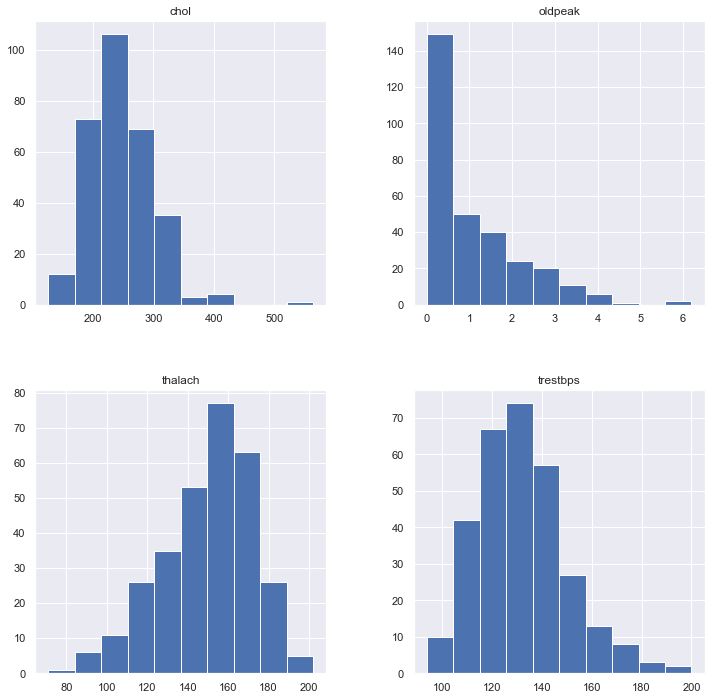

In [61]:
data[['trestbps','chol', 'thalach', 'oldpeak']].hist(figsize = (12,12))
plt.show()

In [60]:
data[['trestbps','chol', 'thalach', 'oldpeak']].skew()

trestbps    0.713768
chol        1.143401
thalach    -0.537410
oldpeak     1.269720
dtype: float64

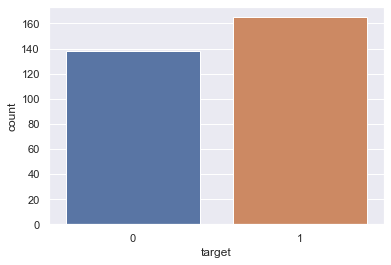

In [66]:
sns.countplot(x = 'target', data = data)
plt.show()

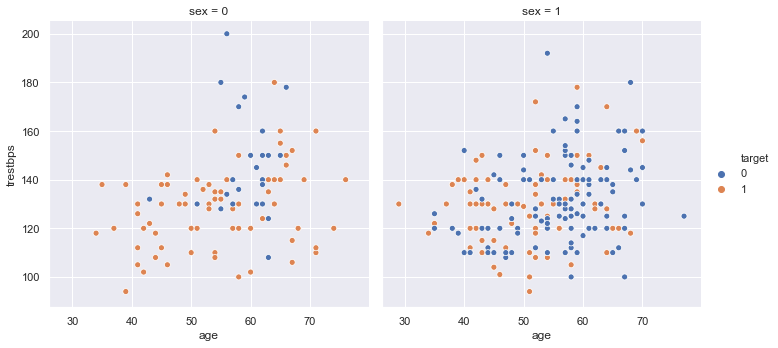

In [68]:
sns.relplot(x = 'age', y = 'trestbps', data = data ,hue = 'target',col = 'sex',kind = 'scatter')
sns.set(style = 'darkgrid')

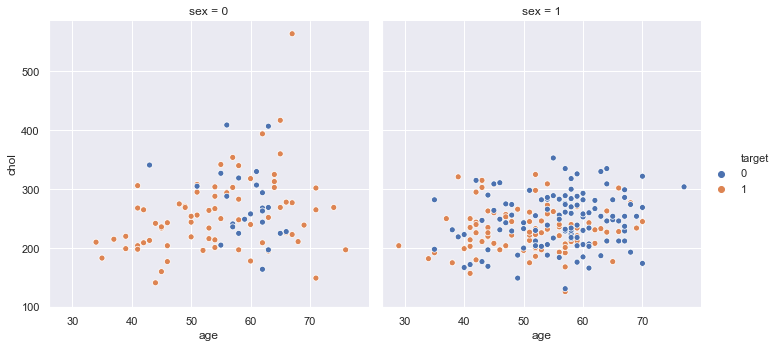

In [69]:
sns.relplot(x = 'age', y = 'chol', data = data ,hue = 'target',col = 'sex',kind = 'scatter')
sns.set(style = 'darkgrid')

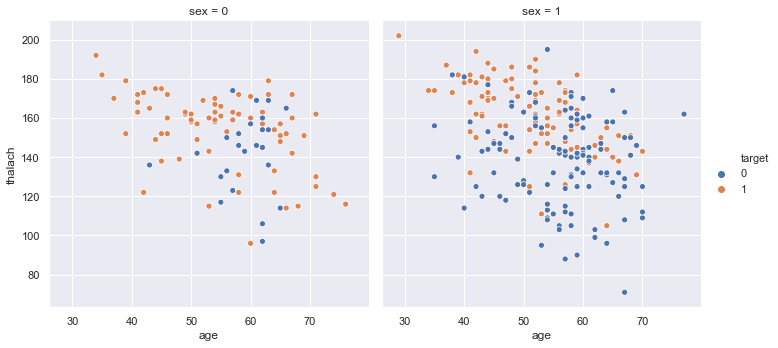

In [70]:
sns.relplot(x = 'age', y = 'thalach', data = data ,hue = 'target',col = 'sex',kind = 'scatter')
sns.set(style = 'darkgrid')

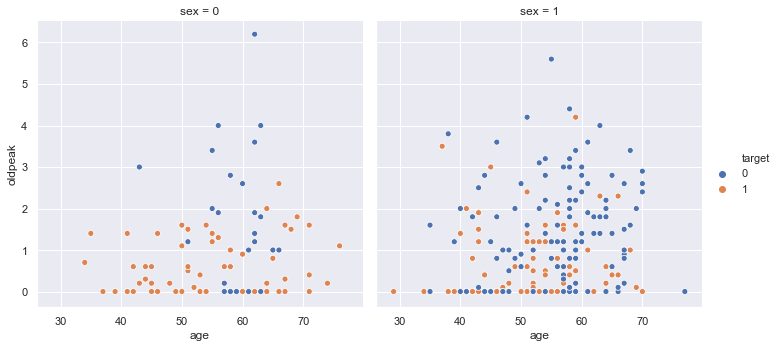

In [71]:
sns.relplot(x = 'age', y = 'oldpeak', data = data ,hue = 'target',col = 'sex',kind = 'scatter')
sns.set(style = 'darkgrid')

### Data Processing

## Handling categorical features

After exploring the dataset, I observed that converting the categorical variables into dummy variables using 'get_dummies()'. Though we don't have any strings in our dataset it is necessary to convert ('sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal') these features.

*Example: Consider the 'sex' column, it is a binary feature which has 0's and 1's as its values. Keeping it as it is would lead the algorithm to think 0 is lower value and 1 is a higher value, which should not be the case since the gender cannot be ordinal feature.*

In [72]:
dataset = pd.get_dummies(data, columns=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [75]:
col = list(dataset.columns)

In [96]:
# dropping column names ends with 0 inorder to avoid dummy variable trap

col = []

for i in list(dataset.columns):
    if i[-1][-1] != '0':
        col.append(i)

dataset[col].head()       

,age,trestbps,chol,thalach,oldpeak,target,sex_1,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0


### Scaling

In [98]:
scaling_data = dataset.iloc[:, :5]
scaling_data.head()

,age,trestbps,chol,thalach,oldpeak
0,63,145,233,150,2.3
1,37,130,250,187,3.5
2,41,130,204,172,1.4
3,56,120,236,178,0.8
4,57,120,354,163,0.6


In [100]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
dataset.iloc[:, :5] = sc.fit_transform(dataset.iloc[:, :5])
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


### Model Building

In [103]:
# split the data into features and lables 

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [111]:
# split the data into train and test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print("traing data shape: {}, test data shape: {}".format(len(X_train), len(X_test)))

traing data shape: 242, test data shape: 61


- Model selection

In [113]:
# Using GridSearchCV to find the best algorithm for this problem
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Creating a function to calculate best model for this problem
def find_best_model(X, y):
    models = {
        'logistic_regression': {
            'model': LogisticRegression(solver='lbfgs', multi_class='auto'),
            'parameters': {
                'C': [1,5,10]
               }
        },
        
        'decision_tree': {
            'model': DecisionTreeClassifier(splitter='best'),
            'parameters': {
                'criterion': ['gini', 'entropy'],
                'max_depth': [5,10]
            }
        },
        
        'random_forest': {
            'model': RandomForestClassifier(criterion='gini'),
            'parameters': {
                'n_estimators': [10,15,20,50,100,200]
            }
        },
        
        'svm': {
            'model': SVC(gamma='auto'),
            'parameters': {
                'C': [1,10,20],
                'kernel': ['rbf','linear']
            }
        }

    }
    
    scores = [] 
    cv_shuffle = ShuffleSplit(n_splits=5, test_size=0.20, random_state=0)
        
    for model_name, model_params in models.items():
        gs = GridSearchCV(model_params['model'], model_params['parameters'], cv = cv_shuffle, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': model_name,
            'best_parameters': gs.best_params_,
            'score': gs.best_score_
        })
        
    return pd.DataFrame(scores, columns=['model','best_parameters','score'])

find_best_model(X_train, y_train)

C:\Users\LOKESH\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\LOKESH\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


,model,best_parameters,score
0,logistic_regression,{'C': 5},1.000000
1,decision_tree,"{'criterion': 'gini', 'max_depth': 5}",1.000000
2,random_forest,{'n_estimators': 50},0.991837
3,svm,"{'C': 1, 'kernel': 'linear'}",1.000000


In [114]:
from sklearn.model_selection import cross_val_score
for i in [5,10]:
    CV_score = cross_val_score(estimator= DecisionTreeClassifier(criterion = 'gini', max_depth = 5), X = X_train,y = y_train, cv = 5 )
    print('CV score: {} for cv = {}'.format(CV_score, i))

CV score: [1. 1. 1. 1. 1.] for cv = 5
CV score: [1. 1. 1. 1. 1.] for cv = 10


In [115]:
# generally decision trees have explainability so lets go with it.

classifier = DecisionTreeClassifier(criterion= 'gini', max_depth= 5)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

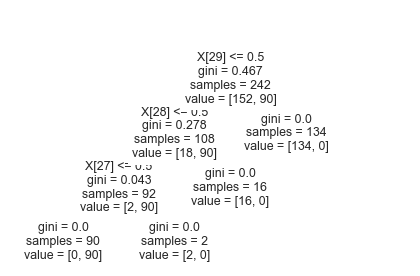

In [148]:
from sklearn.tree import plot_tree
plot_tree(classifier)
plt.tight_layout()
plt.show()

## Check with PCA 

In [125]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X = pca.fit_transform(X)

In [126]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.64883084, 0.35116916])

In [127]:
64+35

99

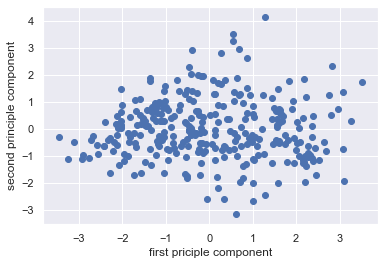

In [128]:
plt.scatter(x = X[:, 0], y= X[:, 1])
plt.xlabel('first priciple component')
plt.ylabel('second principle component')
plt.show()

### Model Evaluation

In [129]:
print("training score: {} and test score: {} ".format(classifier.score(X_train, y_train), classifier.score(X_test, y_test)))

training score: 1.0 and test score: 1.0 


In [130]:
y_pred = classifier.predict(X_test)

In [131]:
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score
cm = confusion_matrix(y_test, y_pred)
cm

array([[34,  0],
       [ 0, 27]], dtype=int64)

In [132]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      1.00      1.00        27

    accuracy                           1.00        61
   macro avg       1.00      1.00      1.00        61
weighted avg       1.00      1.00      1.00        61



In [134]:
print(accuracy_score(y_test, y_pred))

1.0


### ROC curve

In [135]:
from sklearn.metrics import roc_auc_score, roc_curve
fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:, 1])

In [136]:
roc_score = roc_auc_score(y_test, y_pred)
roc_score

1.0

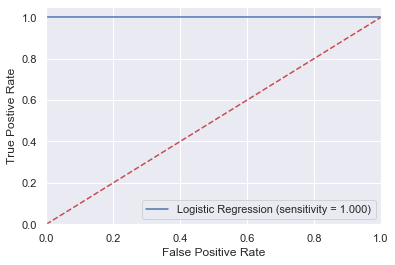

In [137]:
# roc curve
plt.figure()
plt.plot(fpr, tpr, label = 'Logistic Regression (sensitivity = %0.3f)' %roc_score)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Postive Rate')
plt.legend(loc = 'lower right')
plt.show()